In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import importlib
import sys
from pathlib import Path
import os 
sys.path.append(str(Path(os.getcwd()).parent / "src"))

import active_gel
importlib.reload(active_gel)

<module 'active_gel' from '/Users/yuli/Documents/Code/Cleavage/src/active_gel.py'>

In [3]:
def jacobian(m, k): 
    eta = m.eta0 + m.eta1 
    f = eta*k*k + m.gamma 
    M11 = - m.xi*k*k/f - (m.k+k*k)
    M12 = - m.zeta*k*k/f 
    M21 = m.b1/2*m.xi*k*k/f 
    M22 = m.b1/2*(m.zeta*k*k)/f - (m.chi + m.kappa*k*k)/m.b2
    return np.stack([M11, M12, M21, M22], axis=-1)

In [7]:
b1 = 1 # nematic coupling to velocity 
b2 = 15 # motility/diffusion constant 
chi = 0.5 # parameter of the free energy 
kappa = 1  # parameter of the free energy 

etas = [1, 0] # eta0: viscosity, eta1: compressibility (compressibility doesn't matter in 1D)
xi =  -0.2 # contractility of actin
zeta = -0 # contribution of nematic order to active stress 
k = 0.1 # density decay rate 
gamma = 0.1 # friction 

L = 128
T = 200
n_frames = int(T)

init = np.zeros((L*2))
init[L:] = 1 + np.random.normal(scale=0.05, size=(L))

x = np.linspace(0, L, L) - L/2
source = lambda t: 1 + 2*np.exp(-x**2/10)



m = active_gel.ActiveGel(b1, b2, chi, kappa, etas, xi, zeta, k, gamma, source)
m.initialise(L, T, n_frames, init=init)
m.evolve()

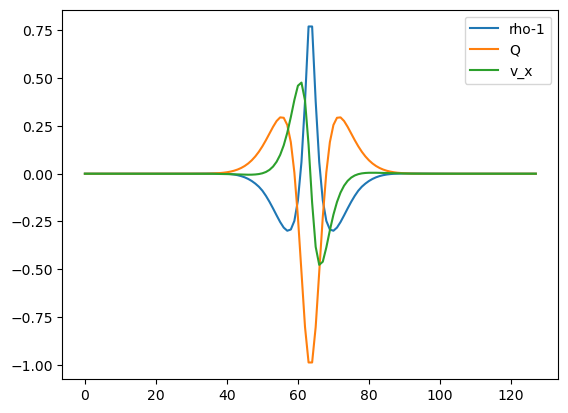

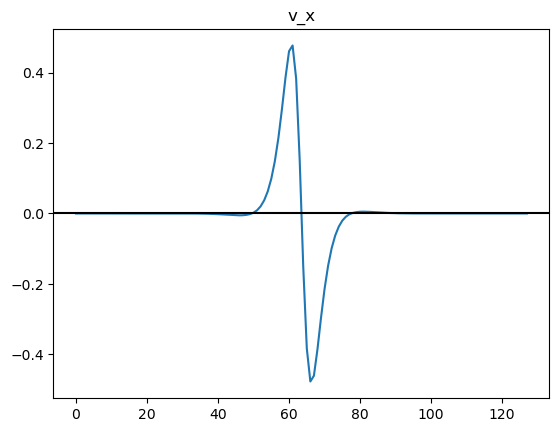

In [8]:
v = list(map(m._solve_for_v, np.linspace(0, T, n_frames), m.rho, m.Q))

plt.plot(m.rho[-1]-1, label='rho-1')
plt.plot(m.Q[-1], label='Q')
plt.plot(v[-1], label='v_x')
plt.legend() 
plt.show() 

plt.plot(v[-1])
plt.title('v_x')
# plt.ylim([-0.02, 0.02])
plt.axhline(y=0, color='k')
plt.show() 

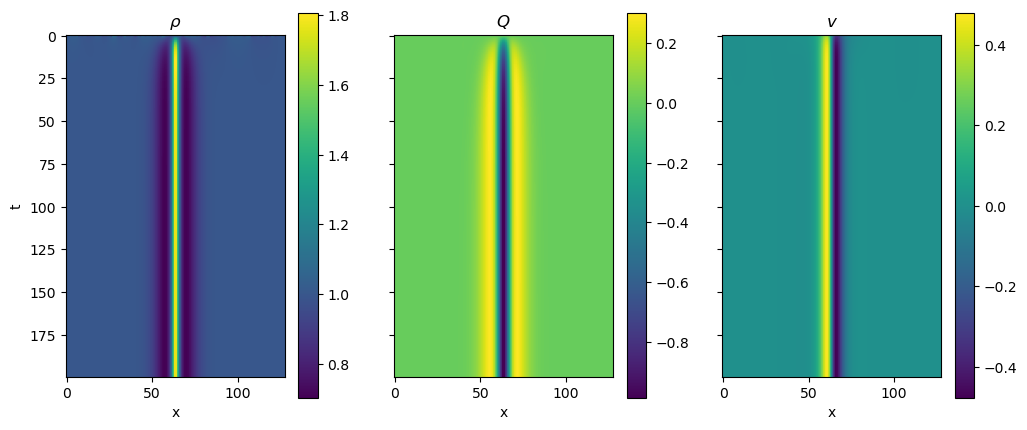

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 5))

im = axes[0].imshow(m.rho)
axes[0].set_title(r'$\rho$')
fig.colorbar(im, ax=axes[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')

im = axes[1].imshow(m.Q)
axes[1].set_title(r'$Q$')
fig.colorbar(im, ax=axes[1])
axes[1].set_xlabel('x')

im = axes[2].imshow(v)
axes[2].set_title(r'$v$')
fig.colorbar(im, ax=axes[2])
axes[2].set_xlabel('x')
plt.show() 

In [10]:
N = 1000
m.xi = xi * max(source)
k = np.linspace(0, 2, N)
J = jacobian(m, k)
J = J.reshape((N, 2, 2))
eigval, eigvec = np.linalg.eig(J)

max_eigval = np.max(eigval, axis=1)
plt.axhline(y=0, color='k')
plt.plot(k, max_eigval.real, label='real')
plt.plot(k, max_eigval.imag, label='imaginary')
plt.xlabel('k')
plt.title('Eigenvalues of the Jacobian')
plt.legend()
plt.show() 

max_n, index = np.unravel_index(np.argmax(eigval, axis=None), eigval.shape)
max_eigval = np.max(eigval)
print(max_eigval)

TypeError: 'function' object is not iterable

In [ ]:
plt.plot(np.mean(m.rho, axis=-1))
plt.show()